In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datasets import load_dataset

In [2]:
# Data Loaded and Data Clean Up: DateTime column converted to DateTime DataType and job_skills column skills were string Converted to List

# dataset = load_dataset('lukebarousse/data_jobs')
# df = dataset['train'].to_pandas()
# Give (#) to the df below and and then remove (#) from the above (dataset & df) to review the Data on your device 

df = pd.read_csv('data_jobs.csv')
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [49]:
df_USA = df[df['job_country'] == 'United States'].copy()

In [50]:
df_US = df_USA.explode('job_skills')

In [51]:
df_skill_count = df_US.groupby(['job_skills', 'job_title_short']).size().reset_index(name='skill_count').sort_values(by='skill_count', ascending=False)
df_skill_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [52]:
df_job_count = df_USA.groupby('job_title_short').size().reset_index(name='job_count').sort_values(by='job_count', ascending=False)
df_job_count

,job_title_short,job_count
2,Data Analyst,67816
4,Data Scientist,58830
3,Data Engineer,35080
8,Senior Data Scientist,12946
6,Senior Data Analyst,11791
7,Senior Data Engineer,9289
0,Business Analyst,7382
9,Software Engineer,1814
5,Machine Learning Engineer,921
1,Cloud Engineer,423


In [55]:
df_merged=df_skill_count.merge(df_job_count,how='left',on='job_title_short')
df_merged['skill_perc'] = (df_merged['skill_count'] / df_merged['job_count']) * 100
df_merged

,job_skills,job_title_short,skill_count,job_count,skill_perc
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


In [59]:
df_merged[df_merged['job_title_short'] == 'Data Scientist'].head()

,job_skills,job_title_short,skill_count,job_count,skill_perc
0,python,Data Scientist,42379,58830,72.036376
2,sql,Data Scientist,30034,58830,51.052184
4,r,Data Scientist,26022,58830,44.232534
10,sas,Data Scientist,14340,58830,24.375319
11,tableau,Data Scientist,13859,58830,23.557709


In [13]:
df_US['job_title_short'].value_counts().head(3)

job_title_short
Data Scientist    322290
Data Analyst      254289
Data Engineer     250493
Name: count, dtype: int64

## So we will look for top 3 Job Titles only i.e. Data Analyst, Data Engineer and Data Scientist 

In [27]:
job_titles = sorted(df_skill_count['job_title_short'].unique().tolist()[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

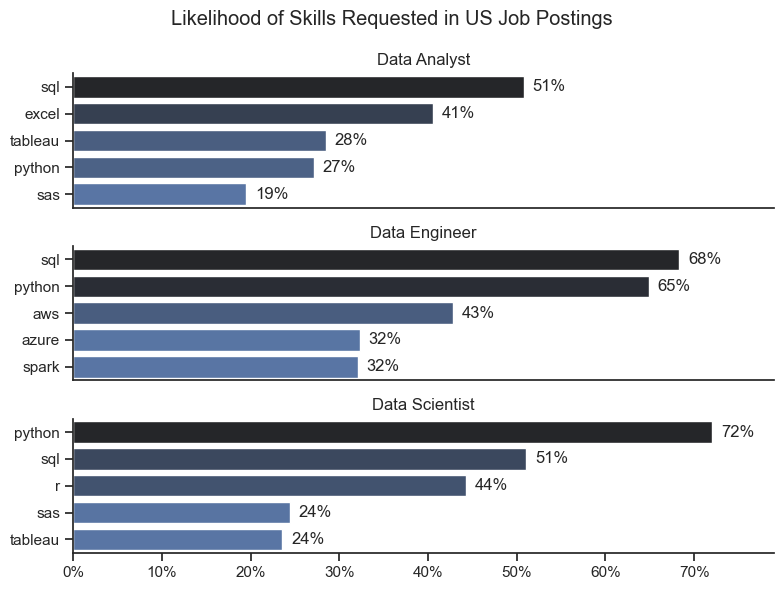

In [109]:
fig, ax = plt.subplots(3,1, figsize=(8,6))

for i, title in enumerate(job_titles):
    df_plot=df_merged[df_merged['job_title_short'] == title].head(5)
    sns.barplot(df_plot, x='skill_perc', y='job_skills', ax=ax[i], hue='skill_perc', palette='dark:b_r')
    sns.despine()
    sns.set_theme(style='ticks')

    ax[i].set_title(title)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_xlim(0,79)
    ax[i].legend().remove()
    ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x)}%'))
    
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])
    
    for n,v in enumerate(df_plot['skill_perc']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

plt.suptitle('Likelihood of Skills Requested in US Job Postings')
plt.tight_layout()
plt.show()